In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from pprint import pprint

%matplotlib inline

In [43]:
wine_data = pd.read_csv("datasets/wine/wine_train.csv")
wine_x = wine_data.drop("Cultivator", axis=1) # drop labels for training set
wine_y = wine_data["Cultivator"].copy()
wine_x.head()

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
2,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195
3,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
4,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650


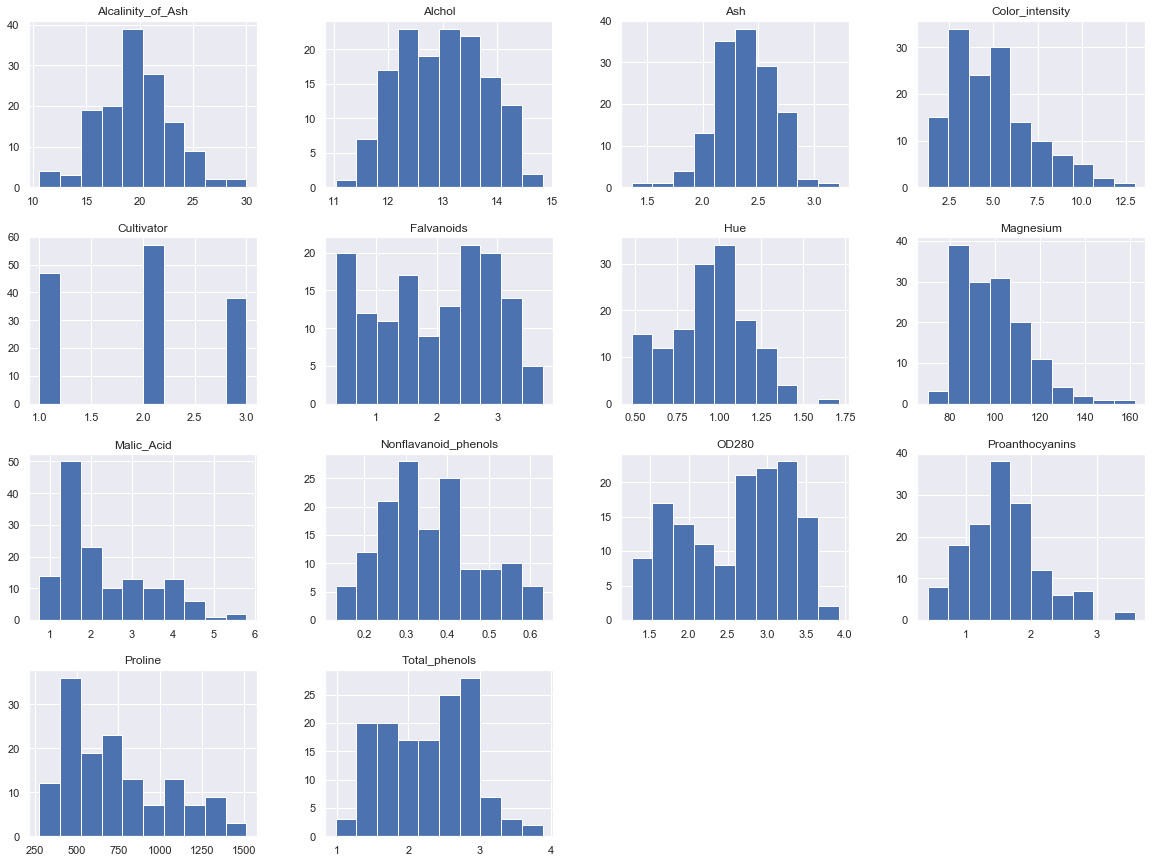

In [44]:
wine_data.hist(bins=10, figsize=(20,15))
plt.show()

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder


num_attribs = list(wine_x)
pprint(num_attribs)

# Replace any missing values with the median value
# Nomalize all the data
# This is all done on the numeric data so:
# housing_num = housing.drop('ocean_proximity', axis=1)
# num_attribs = list(housing_num)


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('nomalize', MinMaxScaler()),
    ])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
#        ("cat", OneHotEncoder(), cat_attribs),
    ])

['Alchol',
 'Malic_Acid',
 'Ash',
 'Alcalinity_of_Ash',
 'Magnesium',
 'Total_phenols',
 'Falvanoids',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280',
 'Proline']


In [46]:
class_list = wine_y.unique()

In [47]:
wine_x_p = full_pipeline.fit_transform(wine_x)

In [48]:
from sklearn.model_selection import StratifiedKFold
train_index=[]
test_index=[]
splits =10
skf = StratifiedKFold(n_splits=splits,random_state=0,shuffle=True)
for train_idx, test_idx in skf.split(wine_x_p,wine_y):               
    train_index.append(train_idx)
    test_index.append(test_idx)

In [49]:
train_index[9]

array([  1,   2,   5,   7,   8,   9,  10,  11,  12,  13,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110,
       111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 141])

In [50]:
import seaborn as sns
def plot_confusion_matrix(cm, classes, title,classifier_name):
    plt.rcParams.update({'font.size': 18})
    fig,ax= plt.subplots(figsize=(5,4))
    sns.set(font_scale=1.5)
    sns_plot = sns.heatmap(cm, annot=True, ax = ax, cmap="Blues"); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
    #fig.savefig(classifier_name+".png")

In [61]:
from sklearn.metrics import confusion_matrix
def classiferTest(classifier,classifier_name,print_cfm,splits =5):
    if print_cfm:
        print(classifier_name)
    train_score = np.zeros(splits)
    validate_score = np.zeros(splits)
    cnf_matrix = np.zeros(shape=(3,3))
    cnf_matrix_f = np.zeros(shape=(3,3))
    for c in range(splits):
        X_train = wine_x_p[train_index[c]]
        y_train = wine_y[train_index[c]]
        X_test = wine_x_p[test_index[c]]
        y_test = wine_y[test_index[c]]
        classifier.fit(X_train,y_train)
        train_score[c] = classifier.score(X_train,y_train)
        validate_score[c] = classifier.score(X_test,y_test)
        y_pred = classifier.predict(X_test)
        cnf = confusion_matrix(y_test, y_pred)
        cnf_f = cnf.astype('float') / cnf.sum(axis=1)[:, np.newaxis]
        for i in range(len(cnf)):
            for j in range(len(cnf)):
                cnf_matrix[i][j] += cnf[i][j]
                cnf_matrix_f[i][j] += cnf_f[i][j]

    print("%6.3f\t%6.3f\t%6.3f\t%6.3f" % (np.average(train_score),np.std(train_score),np.average(validate_score),np.std(validate_score)))
    pprint(cnf)
    
    if print_cfm:
        cnf_av = cnf_matrix/splits
        print()
        print(cnf_av[0][0],cnf_av[0][1],cnf_av[0][2],)
        print(cnf_av[1][0],cnf_av[1][1],cnf_av[1][2],)
        print(cnf_av[2][0],cnf_av[2][1],cnf_av[2][2],)
        print()
        print(class_list[0])
        TP = cnf_av[0][0]
        TN = cnf_av[1][2]+cnf_av[1][2]+cnf_av[2][1]+cnf_av[2][2]
        FP = cnf_av[0][1] + cnf_av[0][2]
        FN = cnf_av[1][0] + cnf_av[2][0]
        #cf_stats(TN,TP,FP,FN)
                    
        print(class_list[1])
        TP = cnf_av[1][1]
        TN = cnf_av[0][0]+cnf_av[0][2]+cnf_av[2][0]+cnf_av[2][2]
        FP = cnf_av[1][0] + cnf_av[1][2]
        FN = cnf_av[0][1] + cnf_av[2][1]
        #cf_stats(TN,TP,FP,FN)
                    
        print(class_list[2])
        TP = cnf_av[2][2]
        TN = cnf_av[0][0]+cnf_av[0][1]+cnf_av[1][0]+cnf_av[1][1]
        FP = cnf_av[2][0] + cnf_av[2][1]
        FN = cnf_av[0][1] + cnf_av[0][2]
        #cf_stats(TN,TP,FP,FN)
                    
        print(classifier)
        print()
        print("Confusion matrix")
        for i in range(len(cnf_matrix)):
            print(class_list[i],end="  \t")
            for j in range(len(cnf_matrix[i])):
                print(cnf_matrix[i][j]/splits,end="\t")
            print()
        print()
        for i in range(len(cnf_matrix_f)):
            print(class_list[i],end="  \t")
            for j in range(len(cnf_matrix_f[i])):
                print("%6.1f" %((cnf_matrix_f[i][j]/splits)*100.0),end="\t")     
            print()
        print()
        print("01",cnf_matrix[0][1])

        ##plot_confusion_matrix(cnf_matrix/10,class_list,'Confusion Matrix')
        plot_confusion_matrix(cnf_matrix_f/splits*100.0,class_list,'Confusion Matrix %',classifier_name)
    return (np.average(train_score),np.std(train_score),np.average(validate_score),np.std(validate_score))

Metabolism-KNeighborsClassifier
 0.970	 0.008	 0.960	 0.053
array([[5, 0, 0],
       [0, 6, 0],
       [0, 0, 4]])

5.0 0.0 0.0
0.2 5.4 0.4
0.0 0.0 4.0

1
3
2
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Confusion matrix
1  	5.0	0.0	0.0	
3  	0.2	5.4	0.4	
2  	0.0	0.0	4.0	

1  	 100.0	   0.0	   0.0	
3  	   3.3	  90.0	   6.7	
2  	   0.0	   0.0	 100.0	

01 0.0


(0.9700787401574804,
 0.007714928323726586,
 0.9600000000000002,
 0.05333333333333332)

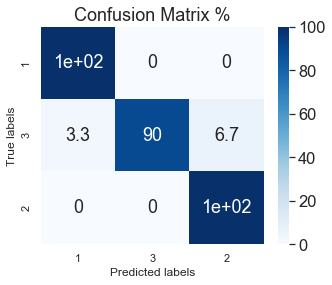

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classiferTest(KNeighborsClassifier(),"Metabolism-KNeighborsClassifier",True)

Metabolism-LogisticRegression
 0.983	 0.008	 0.947	 0.050
array([[5, 0, 0],
       [0, 6, 0],
       [0, 0, 4]])

4.8 0.2 0.0
0.0 5.4 0.6
0.0 0.0 4.0

1
3
2
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Confusion matrix
1  	4.8	0.2	0.0	
3  	0.0	5.4	0.6	
2  	0.0	0.0	4.0	

1  	  96.0	   4.0	   0.0	
3  	   0.0	  90.0	  10.0	
2  	   0.0	   0.0	 100.0	

01 1.0


/home/ric/Projects/Hull/HOMLWSLTF/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ric/Projects/Hull/HOMLWSLTF/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ric/Projects/Hull/HOMLWSLTF/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ric/Projects/Hull/HOMLWSLTF/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ric/Proj

(0.9826771653543307,
 0.007714928323726573,
 0.9466666666666667,
 0.04988876515698587)

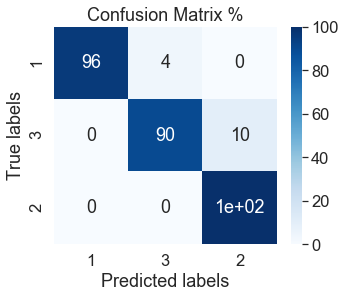

In [64]:
from sklearn.linear_model import LogisticRegression
classiferTest(LogisticRegression(random_state=0),"Metabolism-LogisticRegression",True)

Metabolism-MLPClassifier
 1.000	 0.000	 0.973	 0.033
array([[5, 0, 0],
       [0, 6, 0],
       [0, 0, 4]])

4.8 0.2 0.0
0.0 5.8 0.2
0.0 0.0 4.0

1
3
2
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Confusion matrix
1  	4.8	0.2	0.0	
3  	0.0	5.8	0.2	
2  	0.0	0.0	4.0	

1  	  96.0	   4.0	   0.0	
3  	   0.0	  96.7	   3.3	
2  	   0.0	   0.0	 100.0	

01 1.0


(1.0, 0.0, 0.9733333333333334, 0.03265986323710904)

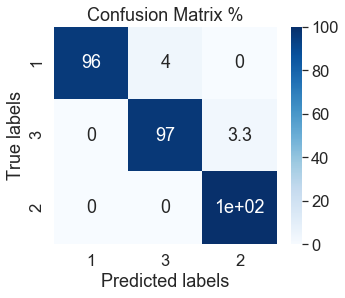

In [65]:
from sklearn.neural_network import MLPClassifier
classiferTest(MLPClassifier(hidden_layer_sizes=(13,6),max_iter=1500),"Metabolism-MLPClassifier",True)

In [66]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.
    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)


Metabolism-DecisionTreeClassifier-entropy-depth3
 0.950	 0.008	 0.880	 0.027
array([[4, 1, 0],
       [1, 5, 0],
       [0, 0, 4]])

4.6 0.4 0.0
0.8 4.8 0.4
0.2 0.0 3.8

1
3
2
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Confusion matrix
1  	4.6	0.4	0.0	
3  	0.8	4.8	0.4	
2  	0.2	0.0	3.8	

1  	  92.0	   8.0	   0.0	
3  	  13.3	  80.0	   6.7	
2  	   5.0	   0.0	  95.0	

01 2.0


(0.9496062992125983,
 0.008029951989909884,
 0.8800000000000001,
 0.026666666666666665)

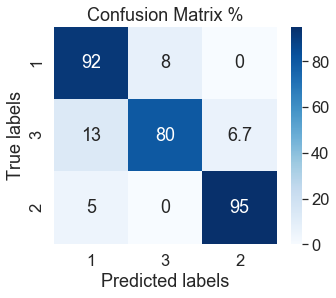

In [68]:
from sklearn.tree import DecisionTreeClassifier
classiferTest(DecisionTreeClassifier(random_state=0,max_depth=2, criterion='entropy'),"Metabolism-DecisionTreeClassifier-entropy-depth3",True)

In [70]:
tree = DecisionTreeClassifier(random_state=0,max_depth=2, criterion='entropy')
tree.fit(wine_x_p,wine_y)
get_code(tree, num_attribs, class_list)

if ( Falvanoids <= 0.3632352948188782 ) {
    if ( Color_intensity <= 0.21715017408132553 ) {
        return 3 ( 12 examples )
    }
    else {
        return 3 ( 1 examples )
        return 2 ( 38 examples )
    }
}
else {
    if ( Proline <= 0.3609539121389389 ) {
        return 1 ( 1 examples )
        return 3 ( 40 examples )
    }
    else {
        return 1 ( 46 examples )
        return 3 ( 4 examples )
    }
}
